Attempt to solve the PA model differential equations system.

In [17]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.1
k = 40
q = 8
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * c)
theta_up = lambda b, c: b / ((2 * (1 - c)))
def dX_dt(X, t = 0):
    """ Return the growth rate of fox and rabbit populations. """
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q - c_up(c) * theta_up(b ,c) ** q) + p / 2 * (c_down(c) - c_up(c)) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_down(b, c)) + p * k / 2 * (1 - 2 * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q * (k - 2 * q - 2 * (k - q) * theta_up(b, c)) + p * k / 2 * (1 - 2 * theta_up(b, c)))) ])

In [18]:
t = linspace(0, 150,  10000)              # time
X0 = array([0.9, 0.05])                 # initials conditions
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0, 0.5, 'value')

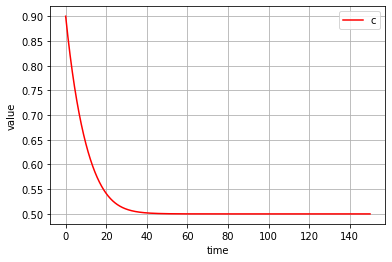

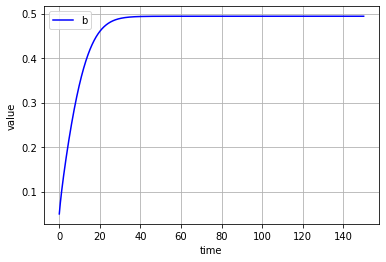

In [19]:
c, b = X.T
f1 = pylab.figure()
pylab.plot(t, c, 'r-', label='c')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')
f2 = pylab.figure()
pylab.plot(t, b  , 'b-', label='b')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')

For different $q_a$ and $q_c$

In [20]:
from numpy import *
import pylab
from scipy import integrate
# Definition of parameters
p = 0.1
k = 40
q_a = 8
q_c = 8
c_down = lambda c: 1 - c
c_up = lambda c: c
theta_down = lambda b, c: b / (2 * c)
theta_up = lambda b, c: b / ((2 * (1 - c)))
def dX_dt(X, t = 0):
    """ Return the growth rate of fox and rabbit populations. """
    c = X[0]
    b = X[1]
    return array([ (1 - p) * (c_down(c) * theta_down(b, c) ** q_c - c_up(c) * theta_up(b ,c) ** q_c) + p * (c_down(c) * ( 1 - theta_down(b, c)) ** q_a - c_up(c) * (1 - theta_up(b, c)) ** q_a) ,
                    2 / k * (c_down(c) * ((1 - p) * theta_down(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_down(b, c)) + p * (1 - theta_down(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_down(b, c))) + 
                    c_up(c) * ((1 - p) * theta_up(b, c) ** q_c * (k - 2 * q_c - 2 * (k - q_c) * theta_up(b, c)) + p * (1 - theta_up(b, c)) ** q_a * (k - 2 * (k - q_a) * theta_up(b, c)))) ])
    

In [23]:
t = linspace(0, 500,  1000)              # time
X0 = array([0.999, 0.0001])                 # initials conditions
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0, 0.5, 'value')

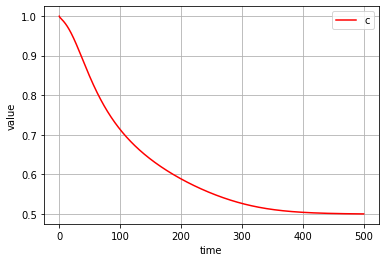

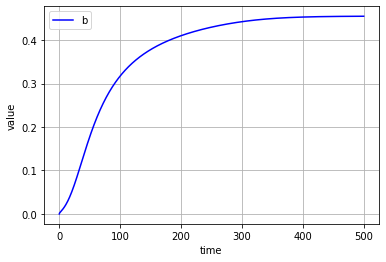

In [24]:
c, b = X.T
f1 = pylab.figure()
pylab.plot(t, c, 'r-', label='c')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')
f2 = pylab.figure()
pylab.plot(t, b  , 'b-', label='b')
pylab.grid()
pylab.legend(loc='best')
pylab.xlabel('time')
pylab.ylabel('value')